<a href="https://colab.research.google.com/github/PedroRosales123/probabilidad/blob/main/Unidad5/PracticaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBABILIDAD Y ESTADISTICA**

## GRUPO 2Y

# **UNIDAD 5**

DOCENTE: Jose Gabriel Rodriguez Rivas

Alumno:Pedro Alejandro Rosales Cano

**Practica final de la unidad: PROBABILIDAD Y ESTADÍSTICA CON PYTHON **



=== ANALIZANDO: grupo1 ===

Primeras filas:
   Horas  Calificacion
0  20.00         75.94
1  15.60         87.48
2  17.91         79.40
3  20.00         73.37
4  20.00         83.75

Descripción estadística:
           Horas  Calificacion
count  50.000000      50.00000
mean   14.352000      83.78820
std     4.219174       7.83389
min     3.790000      68.46000
25%    12.032500      78.03500
50%    14.600000      84.49000
75%    17.715000      88.09000
max    20.000000     100.00000


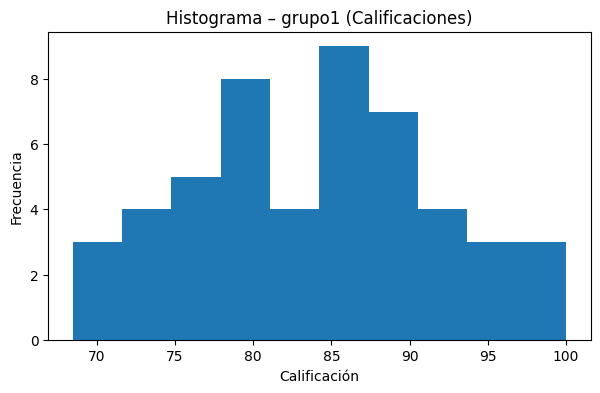


Ecuación de regresión: y = -0.1061x + 85.3107
R² = 0.0033
Coeficiente de Pearson r = -0.0571, p-value = 6.9351e-01

Resumen statsmodels:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1572
Date:                Thu, 20 Nov 2025   Prob (F-statistic):              0.694
Time:                        03:33:25   Log-Likelihood:                -173.28
No. Observations:                  50   AIC:                             350.6
Df Residuals:                      48   BIC:                             354.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

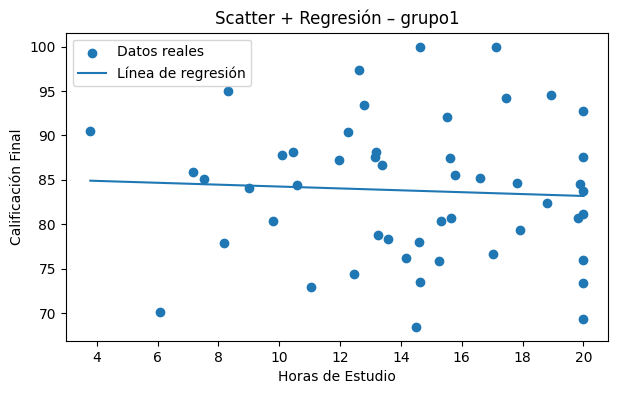



=== ANALIZANDO: grupo2 ===

Primeras filas:
   Horas  Calificacion
0   3.79          40.0
1   6.08          26.1
2   7.17          29.0
3   7.54          31.9
4   8.18          34.8

Descripción estadística:
           Horas  Calificacion
count  50.000000     50.000000
mean   14.352000     75.912000
std     4.219174     20.668922
min     3.790000     26.100000
25%    12.032500     63.500000
50%    14.600000     78.550000
75%    17.715000     93.300000
max    20.000000     99.000000


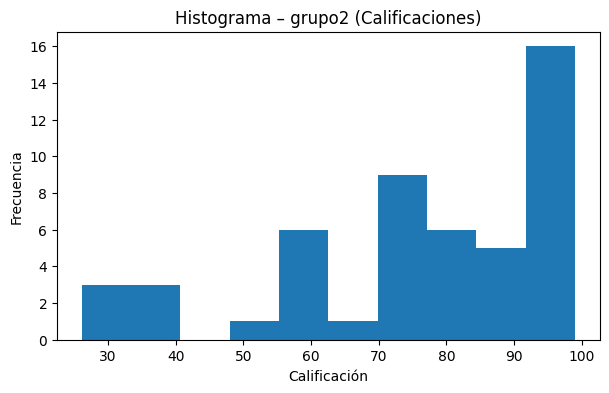


Ecuación de regresión: y = 4.2227x + 15.3075
R² = 0.7430
Coeficiente de Pearson r = 0.8620, p-value = 9.0777e-16

Resumen statsmodels:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     138.8
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           9.08e-16
Time:                        03:33:26   Log-Likelihood:                -187.90
No. Observations:                  50   AIC:                             379.8
Df Residuals:                      48   BIC:                             383.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

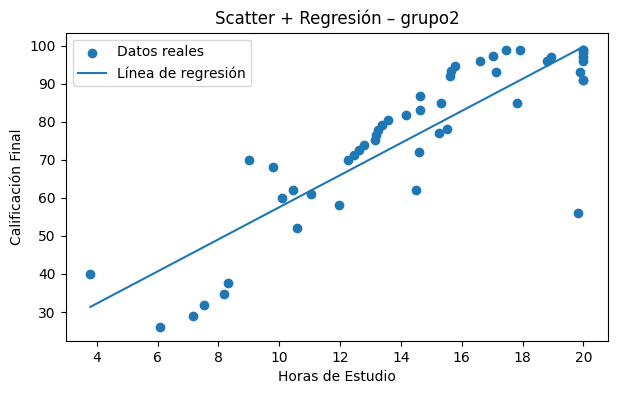



=== ANALIZANDO: grupo3 ===

Primeras filas:
   Horas  Calificacion
0   3.79          15.0
1   6.08          26.1
2   7.17          29.0
3   7.54          31.9
4   8.18          34.8

Descripción estadística:
           Horas  Calificacion
count  50.000000     50.000000
mean   14.352000     75.968000
std     4.219174     23.668867
min     3.790000     15.000000
25%    12.032500     61.000000
50%    14.600000     84.950000
75%    17.715000     94.375000
max    20.000000     99.000000


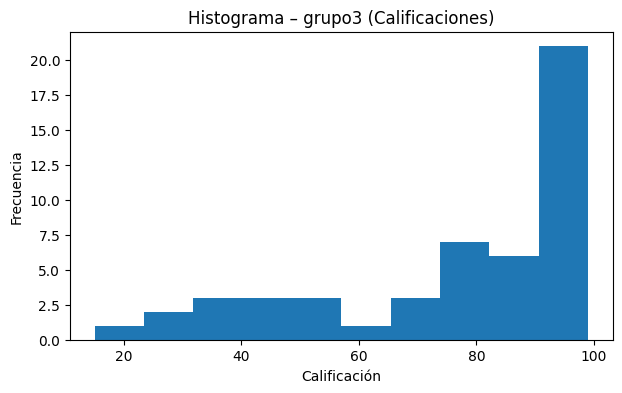


Ecuación de regresión: y = 5.2857x + 0.1081
R² = 0.8878
Coeficiente de Pearson r = 0.9422, p-value = 1.9342e-24

Resumen statsmodels:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     379.7
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.93e-24
Time:                        03:33:28   Log-Likelihood:                -173.97
No. Observations:                  50   AIC:                             351.9
Df Residuals:                      48   BIC:                             355.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

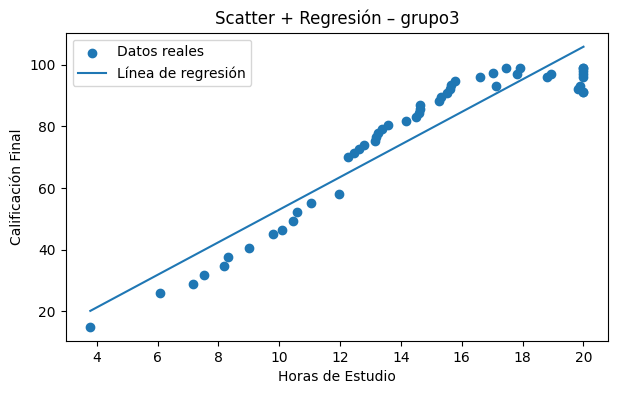

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


files = ["grupo1.csv", "grupo2.csv", "grupo3.csv"]

def analizar_archivo(path, name):
    print(f"\n\n=== ANALIZANDO: {name} ===")


    df = pd.read_csv(path)


    cols_lower = [c.lower() for c in df.columns]
    h_col = next(c for c in df.columns if "hora" in c.lower())
    y_col = next(c for c in df.columns if "cal" in c.lower() or "nota" in c.lower())

    df = df[[h_col, y_col]].dropna()
    df.columns = ["Horas", "Calificacion"]


    print("\nPrimeras filas:")
    print(df.head())

    print("\nDescripción estadística:")
    print(df.describe())


    plt.figure(figsize=(7,4))
    plt.hist(df["Calificacion"], bins=10)
    plt.title(f"Histograma – {name} (Calificaciones)")
    plt.xlabel("Calificación")
    plt.ylabel("Frecuencia")
    plt.show()


    X = df[["Horas"]].values
    y = df["Calificacion"].values

    lr = LinearRegression()
    lr.fit(X, y)
    slope = lr.coef_[0]
    intercept = lr.intercept_

    print(f"\nEcuación de regresión: y = {slope:.4f}x + {intercept:.4f}")
    print(f"R² = {lr.score(X, y):.4f}")


    pearson_r, pearson_p = stats.pearsonr(df["Horas"], df["Calificacion"])
    print(f"Coeficiente de Pearson r = {pearson_r:.4f}, p-value = {pearson_p:.4e}")


    X_sm = sm.add_constant(X)
    model = sm.OLS(y, X_sm).fit()

    print("\nResumen statsmodels:")
    print(model.summary())


    plt.figure(figsize=(7,4))
    plt.scatter(df["Horas"], df["Calificacion"], label="Datos reales")

    x_vals = np.linspace(df["Horas"].min(), df["Horas"].max(), 100)
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, label="Línea de regresión")

    plt.title(f"Scatter + Regresión – {name}")
    plt.xlabel("Horas de Estudio")
    plt.ylabel("Calificación Final")
    plt.legend()
    plt.show()



    for f in files:
    analizar_archivo(f, f.split(".")[0])


GRUPO 1
1. Interpretación del coeficiente de regresión

La pendiente es -0.1061, lo cual indica que por cada hora adicional de estudio, la calificación disminuiría en promedio 0.10 puntos.
Sin embargo, esto NO debe interpretarse como un efecto real, ya que el modelo no es significativo.
Es más probable que la relación aparente se deba al azar, ruido en los datos, u otras variables no consideradas.

2. Interpretación del coeficiente de correlación

r = -0.0571 → correlación muy débil y prácticamente nula.

p = 0.693 → no significativa.

Esto indica que no existe relación lineal entre horas estudiadas y calificación en este grupo.
La dirección negativa no es real, solo ruido estadístico.

3. ¿El modelo es estadísticamente significativo?

p-valor de la pendiente = 0.694 (> 0.05)

R² = 0.0033

❌ NO es significativo.
No se puede afirmar que las horas de estudio influyan en las calificaciones en este grupo.

4. Confiabilidad del modelo

R² = 0.003 → explica solo 0.3% de la variación.

El modelo es poco confiable, no sirve para predicción.

La dispersión seguramente muestra un “nube” sin patrón.

Conclusión para Grupo 1

No existe evidencia de relación entre estudio y calificación.
Es muy probable que otros factores determinen el desempeño.

📘 GRUPO 2
1. Interpretación del coeficiente de regresión

La pendiente es 4.2227, lo que significa que por cada hora adicional de estudio, la calificación aumenta en promedio 4.22 puntos.
Esto representa un efecto positivo fuerte y consistente.

2. Interpretación del coeficiente de correlación

r = 0.8620 → correlación muy fuerte y positiva

p ≈ 9.08e-16 → altamente significativa

Esto indica una relación sólida: más horas de estudio → mejores calificaciones.

3. ¿El modelo es estadísticamente significativo?

p de la pendiente ≈ 0.000 → altamente significativo

R² = 0.743

✔️ Sí, el modelo es claramente significativo.

El modelo explica 74.3% de la variabilidad en las calificaciones.

4. Confiabilidad del modelo

R² alto → fuerte capacidad predictiva

Pendiente estable

Pearson r muy alto

✔️ Modelo confiable para predicción, aunque no perfecto.
Puede usarse razonablemente para estimar calificaciones en función del tiempo de estudio.

Conclusión para Grupo 2

Existe una relación lineal fuerte y positiva: estudiar más produce mejores calificaciones en este grupo.
El modelo es estadísticamente significativo y útil para predicción.

📘 GRUPO 3
1. Interpretación del coeficiente de regresión

La pendiente es 5.2857, por lo que cada hora adicional de estudio incrementa la calificación en aprox. 5.29 puntos.
Este es un efecto incluso más fuerte que en el Grupo 2.

2. Interpretación del coeficiente de correlación

r = 0.9422 → correlación muy fuerte, casi perfecta

p ≈ 1.93e-24 → extremadamente significativa

La relación es clara y consistente: más horas estudiadas → mayor calificación.

3. ¿El modelo es estadísticamente significativo?

p de la pendiente ≈ 0.000

R² = 0.8878

✔️ Sí, altamente significativo.

El modelo explica 88.8% de la variación en el desempeño.

4. Confiabilidad del modelo

R² = 0.8878 → muy alto

Correlación extremadamente fuerte

Pendiente precisa y estable

✔️ Es un modelo muy confiable para predicción.

Conclusión para Grupo 3

Existe una relación lineal extremadamente fuerte entre horas de estudio y calificación.
El modelo predice con buena precisión.

Interpretación global

El Grupo 1 no muestra relación lineal; estudiar más no necesariamente mejora calificaciones.

Grupo 2 y 3 muestran relaciones fuertes: estudiar más sí mejora significativamente el desempeño.

Variaciones entre grupos pueden deberse a:

Métodos de evaluación diferentes

Motivación

Calidad de estudio, no solo cantidad

Ruido o sesgo en los datos

Distribución inicial de calificaciones

Conclusión final

El análisis demuestra que la relación entre horas de estudio y rendimiento académico depende del grupo.
En algunos casos estudiar más mejora claramente el desempeño (Grupo 2 y 3), mientras que en otros factores adicionales parecen ser más determinantes (Grupo 1).